validation accuracy:  32.71028037383178


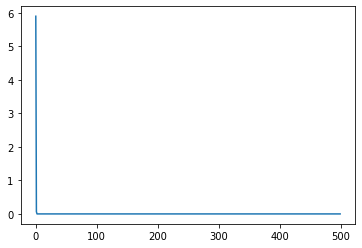

In [18]:
from numpy import genfromtxt
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

data_path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
my_data = genfromtxt(data_path, delimiter=',') # numpy array n_samples x (feature+1)
np.random.shuffle(my_data)

# print(type(my_data))
# print(my_data.shape)
# print(my_data.shape[1])

data = my_data.tolist() # 2d list

# separate the dataset
Train_set=[]
Val_set=[]
Test_set=[]

for i in range(0,len(data)):
    R = random.random()
    if R>=0 and R<=0.7:
        Train_set.append(data[i])
    elif R>0.7 and R<=0.85:
        Val_set.append(data[i])
    else :
        Test_set.append(data[i])


#generate theta
theta = []
for i in range(0,my_data.shape[1]):
    theta.append(random.random())

def sigmoid(x):
    x = np.float128(x)
    return 1.0 / (1.0 + np.exp(-x))

def subtract_list(list1,list2):
    array1 = np.array(list1)
    array2 = np.array(list2)
    subtracted_array = np.subtract(array1, array2)
    subtracted = list(subtracted_array)
    return subtracted

#TRAIN (update 𝚹):

max_iter = 500
lr = 0.001
history = []
eps = 0.00000001

for itr in range(0,max_iter):
    TJ = 0
    for x in Train_set:
        y = x[-1] #take the value of y
        x[-1] = 1 #concat 1 to x

        z = np.dot(x,theta)
        h = sigmoid(z) 
        J = - y * np.log(eps+h) - ((1-y) * np.log(1-h+eps))
        TJ = TJ + J

        dv = [item * (h-y) for item in x]  #dv = X’ . (h-y) 
        dv_lr = [item * lr for item in dv]
        theta = subtract_list(theta,dv_lr) #𝚹 = 𝚹 - dv * lr
    
    TJ = TJ / len(Train_set)
    history.append(TJ)




#VALIDATION:

correct = 0
for v in Val_set:
    y = v[-1]
    v[-1] = 1

    z = np.dot(v,theta)
    h = sigmoid(z)
    if h >= 0.5:
        h = 1
    else :
        h = 0
    if(h==y):
        correct += 1
val_acc = (correct * 100) / len(Val_set)

print('validation accuracy: ',val_acc)


#ploting Graph

plt.plot(history)
plt.show()

Graph

Test Accuracy

33.61344537815126


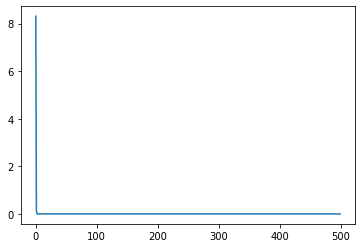

In [19]:
from numpy import genfromtxt
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

data_path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
my_data = genfromtxt(data_path, delimiter=',') # numpy array n_samples x (feature+1)
np.random.shuffle(my_data)

# print(type(my_data))
# print(my_data.shape)
# print(my_data.shape[1])

data = my_data.tolist() # 2d list

# separate the dataset
Train_set=[]
Val_set=[]
Test_set=[]

for i in range(0,len(data)):
    R = random.random()
    if R>=0 and R<=0.7:
        Train_set.append(data[i])
    elif R>0.7 and R<=0.85:
        Val_set.append(data[i])
    else :
        Test_set.append(data[i])


#generate theta
theta = []
for i in range(0,my_data.shape[1]):
    theta.append(random.random())

def sigmoid(x):
    x = np.float128(x)
    return (1.0 / (1.0 + np.exp(-x)))

def subtract_list(list1,list2):
    array1 = np.array(list1)
    array2 = np.array(list2)

    subtracted_array = np.subtract(array1, array2)
    subtracted = list(subtracted_array)
    return subtracted

#TRAIN (update 𝚹):

max_iter = 500
lr = 0.01
history = []
eps = 0.00000001

for itr in range(0,max_iter):
    TJ = 0
    for x in Train_set:
        y = x[-1] #take the value of y
        x[-1] = 1 #concat 1 to x

        z = np.dot(x,theta)
        h = sigmoid(z) 
        J = (- y * np.log(eps+h)) - ((1-y) * np.log(1-h+eps))
        TJ = TJ + J

        dv = [item * (h-y) for item in x]  #dv = X’ . (h-y) 
        dv_lr = [item * lr for item in dv]
        theta = subtract_list(theta,dv_lr) #𝚹 = 𝚹 - dv * lr
    
    TJ = TJ / len(Train_set)
    history.append(TJ)




#VALIDATION:

correct = 0
for T in Test_set:
    y = T[-1]
    T[-1] = 1

    z = np.dot(T,theta)
    h = sigmoid(z)
    if h >= 0.5:
        h = 1
    else :
        h = 0
    if(h==y):
        correct += 1
val_acc = (correct * 100) / len(Test_set)

print(val_acc)

plt.plot(history)
plt.show()
